In [1]:
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'] + '/azav')
from azav_util import plot_azav
from common import *
from plotcommon import *
from constants import *

sys.path.append(os.environ['rapl'] + '/timetrace')
from cla_util import *
from plotcommon import *
from timey_util import *

labelsize = 8

In [2]:
dirname = '/nobackup/lmatilsk/case_M_tspec-lowcad/'
datadir = dirname + 'data/'
mtracedir = datadir + 'mtrace_mmax010/'

In [3]:
radlevs = get_slice_levels(dirname)
print ('irvals     =', radlevs.inds)
print ('rvals      = ' + arr_to_str(radlevs.radius, "%1.3e"))
print ('rvals/rsun = ' + arr_to_str(radlevs.radius/rsun, "%.3f"))

irvals     = [ 73  85  99 137 147 155 161 168 176 182]
rvals      = [4.985e+10 4.919e+10 4.805e+10 4.599e+10 4.414e+10 4.198e+10 4.018e+10 3.810e+10 3.606e+10 3.494e+10]
rvals/rsun = [0.717 0.707 0.691 0.661 0.634 0.603 0.578 0.548 0.518 0.502]


In [4]:
# Get necessary grid info
di_grid = get_grid_info(dirname)
rr = di_grid['rr']
cost = di_grid['cost']
sint = di_grid['sint']
tt_lat = di_grid['tt_lat']
xx = di_grid['xx']
tt = di_grid['tt']
nt = di_grid['nt']
nr = di_grid['nr']
nphi = di_grid['nphi']

In [5]:
irval = 0
part = 'real'
mval = 1
ntimes = 5000

if part == 'imag':
    partfunc = np.imag
elif part == 'abs':
    partfunc = np.abs
elif part == 'real':
    partfunc = np.real

# read in induction data
qval = 802
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
bt = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3002
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
indt = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3005
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
sheart = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3008
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
advt = thin_data(di['vals'][:, mval, :], ntimes)

qval = 3011
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
compt = thin_data(di['vals'][:, mval, :], ntimes)

qval = 1610
the_file = get_widest_range_file(mtracedir, 'mtrace_qval%04i_irval%02i' %(qval, irval))
print("reading " + the_file)
di = get_dict(the_file)
difft = thin_data(di['vals'][:, mval, :], ntimes)

reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval0802_irval00-17751000_21286000.pkl
reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval3002_irval00-17751000_21286000.pkl
reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval3005_irval00-17751000_21286000.pkl
reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval3008_irval00-17751000_21286000.pkl
reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval3011_irval00-17751000_21286000.pkl
reading /nobackup/lmatilsk/case_M_tspec-lowcad/data/mtrace_mmax010/mtrace_qval1610_irval00-17751000_21286000.pkl


In [6]:
# Get RHS of induction equation
times = thin_data(di['times'], ntimes)
prot = 2*np.pi/8.61e-6
t = times/prot
dbtdt =  np.gradient(bt, times, axis=0)

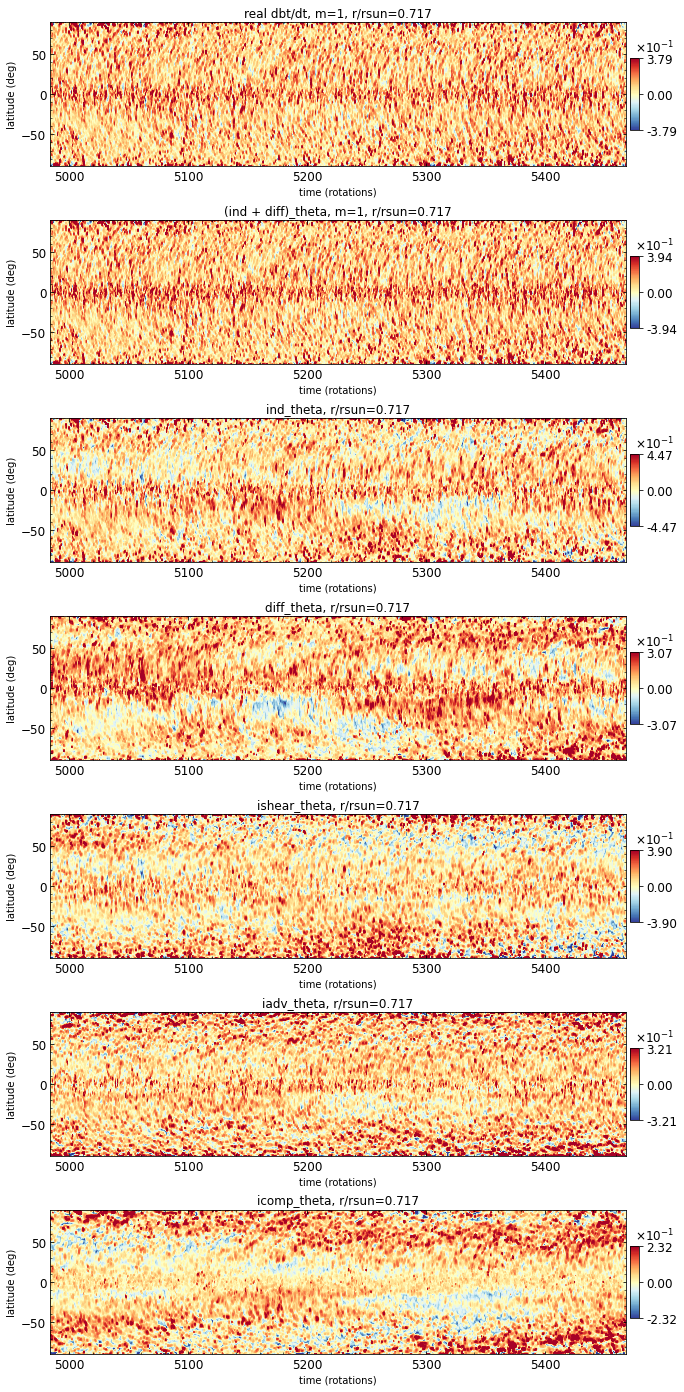

In [7]:
# now plot induction equation 

fig, axs, fpar = make_figure(nplots=7, ncol=1, sub_width_inches=8, sub_height_inches=2, margin_right_inches=3/4,\
                            margin_top_inches=1/4, margin_left_inches=5/8)

ax = axs[0, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title(part + ' dbt/dt, m=%i, r/rsun=%0.3f' %(mval, radlevs.radius[irval]/rsun))
field = partfunc(dbtdt)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[1, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('(ind + diff)_theta, m=%i, r/rsun=%0.3f' %(mval, radlevs.radius[irval]/rsun))
field = partfunc(indt + difft)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[2, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('ind_theta, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(indt)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[3, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('diff_theta, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(difft)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[4, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('ishear_theta, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(sheart)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[5, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('iadv_theta, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(advt)
plot_timey(field, times/prot, tt_lat, fig, ax)

ax = axs[6, 0]
ax.set_xlabel('time (rotations)')
ax.set_ylabel('latitude (deg)')
ax.set_title('icomp_theta, r/rsun=%0.3f' %(radlevs.radius[irval]/rsun))
field = partfunc(compt)
plot_timey(field, times/prot, tt_lat, fig, ax)

savename = 'ialtt_' + part + '_mval%03i_rval%0.3f.png' %(mval, radlevs.radius[irval]/rsun) 
plt.savefig('ialtt/' + savename, dpi=300)

In [8]:
np.shape(bt)

(3535, 384)

In [9]:
np.shape(thin_data(bt, 500))

(505, 384)